In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd drive/MyDrive/
%ls

/content/drive/MyDrive
'11777 Project'@                             'Resume-Xuanyi - New Grad (2).pdf'
'AI Presentation Coach MCDS Capstone 2021'@  'Resume-Xuanyi - New Grad (3).pdf'
 dataset.tar.gz                              'Resume-Xuanyi - New Grad.pdf'
'First assignment.gdoc'                      'Resume-Xuanyi - Waymo.pdf'
'Getting started.pdf'                        'Resume-Xuanyi - Work.pdf'
 GoogleNews-vectors-negative300.bin.gz        sentences.json
'kernel_approx (1).gdoc'                      sg_test_annotations.json
 kernel_approx.gdoc                           sg_train_annotations.json
 MCDS_InternshipOverview_F21_Poster.pdf       similar_words.png
'poster.pptx - Column chart 1 (1).gsheet'     vtranse@
'poster.pptx - Column chart 1.gsheet'         Word2Vec.ipynb
'Pre-WS PYBS Team Feedback May'@              Workflow.png
'Resume-Xuanyi - New Grad (1).pdf'


In [1]:
import gensim
from gensim.models import Word2Vec
# Need the interactive Tools for Matplotlib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

In [7]:
# load pretrained model
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [28]:
# refer to https://aneesha.medium.com/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word,  topn=30)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=3, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+500, x_coords.max()+500)
    plt.ylim(y_coords.min()+5, y_coords.max()+5)
    plt.show()

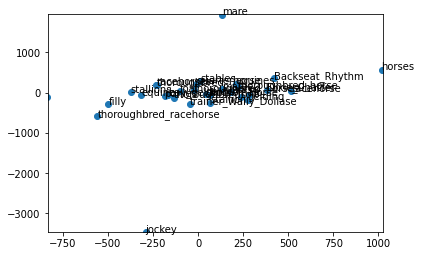

In [10]:
display_closestwords_tsnescatterplot(model, 'horse')

In [31]:
# refer to https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d

import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()

def plot_similar_words(model, keys):
    embedding_clusters = []
    word_clusters = []
    for word in keys:
        embeddings = []
        words = []
        for similar_word, _ in model.most_similar(word, topn=30):
            words.append(similar_word)
            embeddings.append(model[similar_word])
        embedding_clusters.append(embeddings)
        word_clusters.append(words)

    embedding_clusters = np.array(embedding_clusters)
    n, m, k = embedding_clusters.shape
    tsne_model_en_2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=3500, random_state=32)
    embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


    tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                          'similar_words.png')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

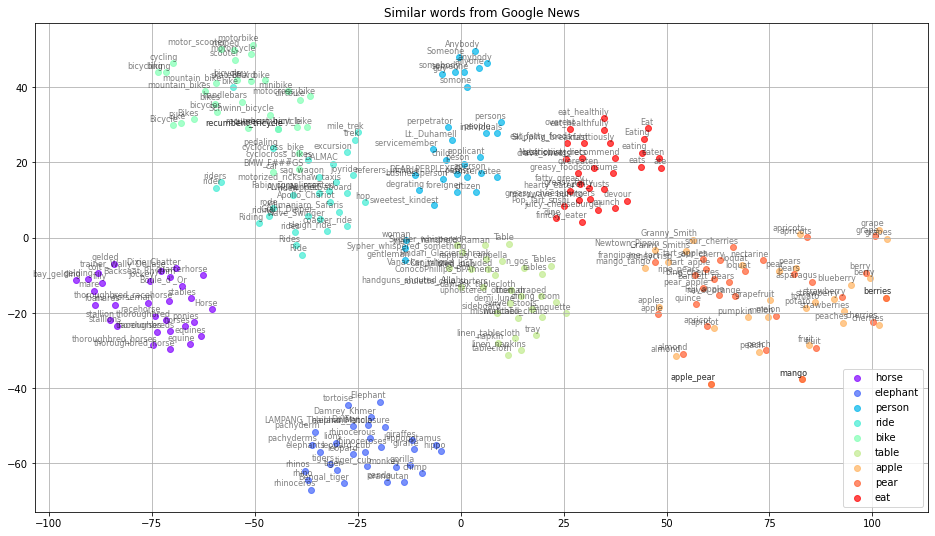

In [12]:
keys = ['horse', 'elephant', 'person', 'ride', 'bike', 'table', 'apple', 'pear', 'eat']
plot_similar_words(model, keys)

In [13]:
# Convert annotation to sentences

import json 
# def annotations_to_sentences(annotations):
#   res = []
#   for annotation in annotations:
#     for r in annotation['relationships']:
#       res.append(r['text'])
#   return res

# with open('sg_train_annotations.json') as f:
#   annotations = json.load(f)
#   train_sentences = annotations_to_sentences(annotations)

# with open('sg_test_annotations.json') as f:
#   annotations = json.load(f)
#   test_sentences = annotations_to_sentences(annotations)

# sentences = {'train': train_sentences, 'test': test_sentences}
# with open('sentences.json', 'w') as outfile:
#     json.dump(sentences, outfile)

# load sentences
with open('sentences.json') as f:
  sentences = json.load(f)
  train_sentences = sentences['train']
  test_sentences = sentences['test']


In [21]:
# finetune with other training data
mymodel = Word2Vec(train_sentences, size=300)
mymodel.intersect_word2vec_format('GoogleNews-vectors-negative300.bin.gz',
                                lockf=1.0,
                                binary=True)

300


In [25]:
mymodel.train(train_sentences,total_examples=len(train_sentences), epochs=10)

(1642375, 2701560)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


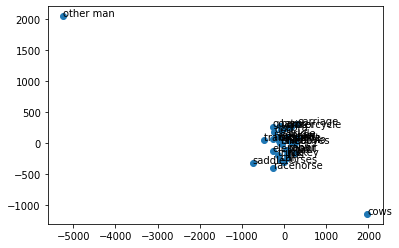

In [29]:
display_closestwords_tsnescatterplot(mymodel, 'horse')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value fo

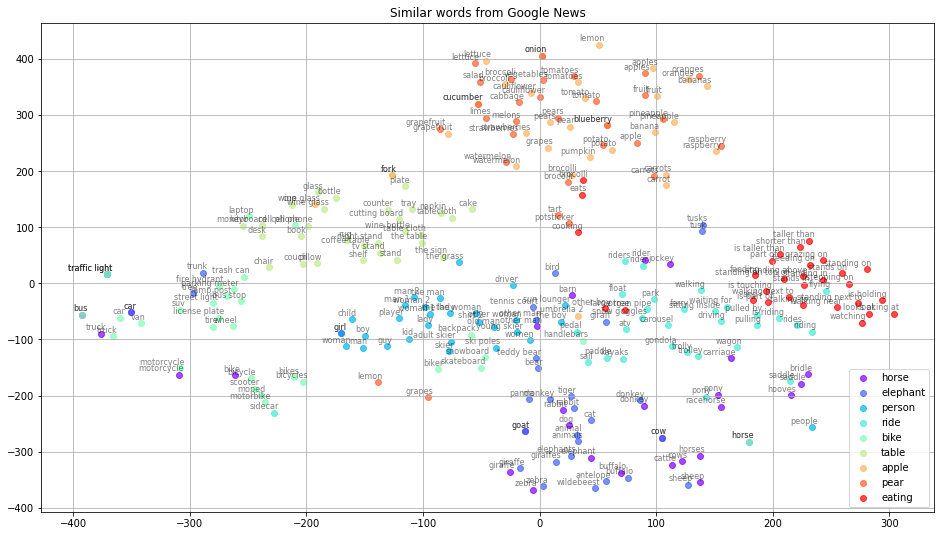

In [36]:
keys = ['horse', 'elephant', 'person', 'ride', 'bike', 'table', 'apple', 'pear', 'eating']
plot_similar_words(mymodel, keys)
